## Importing packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import bokeh as bk

## 1. Null model: Bernoulli

To model the probability of each individual in the group for each experiment, we can use the equation:

$$P = 1 - (1-p)^t$$  

where,   `t` represents the global time of each experiment. 

In [2]:
time = np.arange(1, 25000)
mean = .00023
lower = .00013
upper = .00034
P_mean = 1 - (1 - mean)**time
P_lower = 1 - (1 - lower)**time
P_upper = 1 - (1 - upper)**time

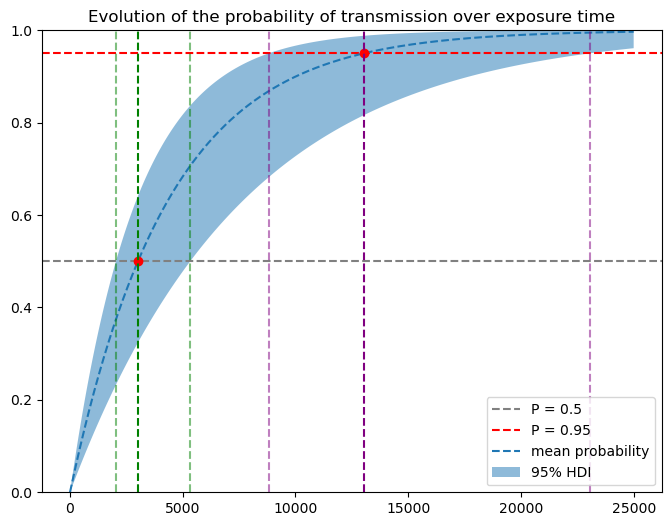

In [6]:
fig, ax = plt.subplots(figsize=(8,6))

ax.set_ylim([0, 1])
ax.axhline(0.5, color='gray', linestyle='--', label= 'P = 0.5')
ax.axhline(0.95, color='red', linestyle='--', label= 'P = 0.95')


ax.plot(time, P_mean, linestyle='--', label='mean probability')
ax.fill_between(time, 
                P_lower, 
                P_upper,
                alpha=0.5, label='95% HDI')


# Find the time when the curves intersect with the horizontal lines
interact_time_mean1 = np.where(P_mean >= 0.5)[0][0]
interact_time_mean2 = np.where(P_mean >= 0.95)[0][0]


interact_time_upper1 = np.where(P_upper >= 0.5)[0][0]
interact_time_lower1 = np.where(P_lower >= 0.5)[0][0]
interact_time_upper2 = np.where(P_upper >= 0.95)[0][0]
interact_time_lower2 = np.where(P_lower >= 0.95)[0][0]

# Plot the interaction points
ax.plot(interact_time_mean1, P_mean[interact_time_mean1], 'ro')
ax.plot(interact_time_mean2, P_mean[interact_time_mean2], 'ro')


# Add legend
ax.legend()

# Draw vertical lines at the intersection points
ax.axvline(x=interact_time_lower1, color='g', linestyle='--',alpha=0.5)
ax.axvline(x=interact_time_mean1, color='g', linestyle='--' )
ax.axvline(x=interact_time_upper1, color='g', linestyle='--', alpha=0.5)

ax.axvline(x=interact_time_lower2, color='purple', linestyle='--', alpha=0.5)
ax.axvline(x=interact_time_mean2, color='purple', linestyle='--')
ax.axvline(x=interact_time_upper2, color='purple', linestyle='--', alpha = 0.5)

plt.title('Evolution of the probability of transmission over exposure time')

# Show Plot
plt.show()


# Get the x-axis coordinates for the intersections
interact_time_lower1_x = time[interact_time_lower1]
interact_time_mean1_x = time[interact_time_mean1]
interact_time_upper1_x = time[interact_time_upper1]
interact_time_lower2_x = time[interact_time_lower2]
interact_time_mean2_x = time[interact_time_mean2]
interact_time_upper2_x = time[interact_time_upper2]

In [8]:
# Calculate the mean exposure time for a probability of infection of 0.5
mean_exposure_0_5 = interact_time_mean1_x
lower_exposure_0_5 = interact_time_lower1_x
upper_exposure_0_5 = interact_time_upper1_x

# Calculate the mean exposure time for a probability of infection of 0.95
mean_exposure_0_95 = interact_time_mean2_x
lower_exposure_0_95 = interact_time_lower2_x
upper_exposure_0_95 = interact_time_upper2_x

# Generate the result statements
result_0_5 = f"For a probability of infection of 0.5, the mean exposure time is estimated to be {mean_exposure_0_5/60} with a 95% confidence interval ranging from {lower_exposure_0_5/60} to {upper_exposure_0_5/60}."
result_0_95 = f"For a probability of infection of 0.95, the mean exposure time is estimated to be {mean_exposure_0_95/60} with a 95% confidence interval ranging from {lower_exposure_0_95/60} to {upper_exposure_0_95/60}."

# Print the results
print(result_0_5)
print(result_0_95)

For a probability of infection of 0.5, the mean exposure time is estimated to be 50.233333333333334 with a 95% confidence interval ranging from 5332 to 2039.
For a probability of infection of 0.95, the mean exposure time is estimated to be 217.06666666666666 with a 95% confidence interval ranging from 23043 to 8810.


## 2. Segmented models

## 3. Stratified models

## 4. Enveloppes models